In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Análise Fatorial por Componentes Principais

Exemplo da aula do MBA DSA USP/ESALQ com Prof. Wilson Tarantin Jr.

Fonte: Fávero e Belfiore, MANUAL DE ANÁLISE DE DADOS, Capítulo 10

- Referência: https://www.datacamp.com/tutorial/introduction-factor-analysis

- Documentação: https://factor-analyzer.readthedocs.io/en/latest/factor_analyzer.html


### Aplicabilidade

Objetivo de agrupar as variáveis do dataset. <br>

É aplicada quando as variáveis forem métrica, pois depende da matriz de correlação de pearson.

### Objetivo da Análise

Gerar um indicador que contemple as características das pessoas que possuem conta no banco a fim de verificar quais delas podemos conceder empréstimo.

Variáveis:

- Age
- Experience: anos de experiência profissional
- Income
- Family
- CCAvg: gasto médio no cartão de crédito
- Mortgage

In [3]:
#Importando a base

emprestimo = pd.read_excel(r'bases\emprestimo_banco.xlsx')
emprestimo.head()

,ID,Age,Experience,Income,Family,CCAvg,Mortgage
0,1,25,1,49,4,1.6,0
1,2,45,19,34,3,1.5,0
2,3,39,15,11,1,1.0,0
3,4,35,9,100,1,2.7,0
4,5,35,8,45,4,1.0,0


## Análise Descritiva

In [42]:
variaveis = emprestimo.iloc[:,1:]
variaveis.describe().round(3)

,Age,Experience,Income,Family,CCAvg,Mortgage
count,5000.000,5000.00,5000.000,5000.000,5000.000,5000.000
mean,45.338,20.12,73.774,2.396,1.938,56.499
std,11.463,11.44,46.034,1.148,1.748,101.714
min,23.000,0.00,8.000,1.000,0.000,0.000
25%,35.000,10.00,39.000,1.000,0.700,0.000
50%,45.000,20.00,64.000,2.000,1.500,0.000
75%,55.000,30.00,98.000,3.000,2.500,101.000
max,67.000,43.00,224.000,4.000,10.000,635.000


### Matriz de Correlação

In [8]:
matriz_corr = variaveis.corr()
matriz_corr

,Age,Experience,Income,Family,CCAvg,Mortgage
Age,1.000000,0.994198,-0.055269,-0.046418,-0.052030,-0.012539
Experience,0.994198,1.000000,-0.046729,-0.052213,-0.049925,-0.010840
Income,-0.055269,-0.046729,1.000000,-0.157501,0.645993,0.206806
Family,-0.046418,-0.052213,-0.157501,1.000000,-0.109285,-0.020445
CCAvg,-0.052030,-0.049925,0.645993,-0.109285,1.000000,0.109909
Mortgage,-0.012539,-0.010840,0.206806,-0.020445,0.109909,1.000000


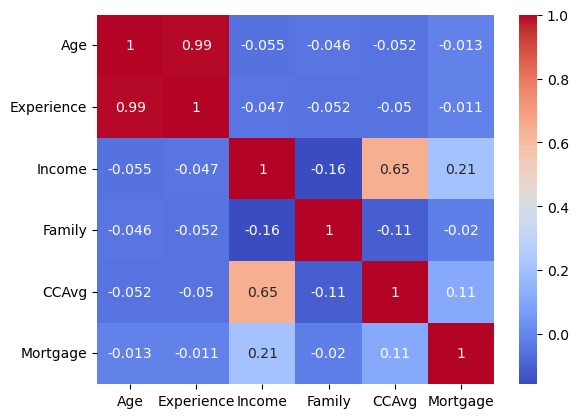

In [44]:
#Gráfico matriz correlação

sns.heatmap(matriz_corr, cmap='coolwarm', annot=True)
plt.show()

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Experience', ylabel='Age'>,
        <AxesSubplot:xlabel='Income', ylabel='Age'>,
        <AxesSubplot:xlabel='Family', ylabel='Age'>,
        <AxesSubplot:xlabel='CCAvg', ylabel='Age'>,
        <AxesSubplot:xlabel='Mortgage', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Experience'>,
        <AxesSubplot:xlabel='Experience', ylabel='Experience'>,
        <AxesSubplot:xlabel='Income', ylabel='Experience'>,
        <AxesSubplot:xlabel='Family', ylabel='Experience'>,
        <AxesSubplot:xlabel='CCAvg', ylabel='Experience'>,
        <AxesSubplot:xlabel='Mortgage', ylabel='Experience'>],
       [<AxesSubplot:xlabel='Age', ylabel='Income'>,
        <AxesSubplot:xlabel='Experience', ylabel='Income'>,
        <AxesSubplot:xlabel='Income', ylabel='Income'>,
        <AxesSubplot:xlabel='Family', ylabel='Income'>,
        <AxesSubplot:xlabel='CCAvg', ylabel='Income'>,
        <AxesSubplot:xlabel='Mortgag

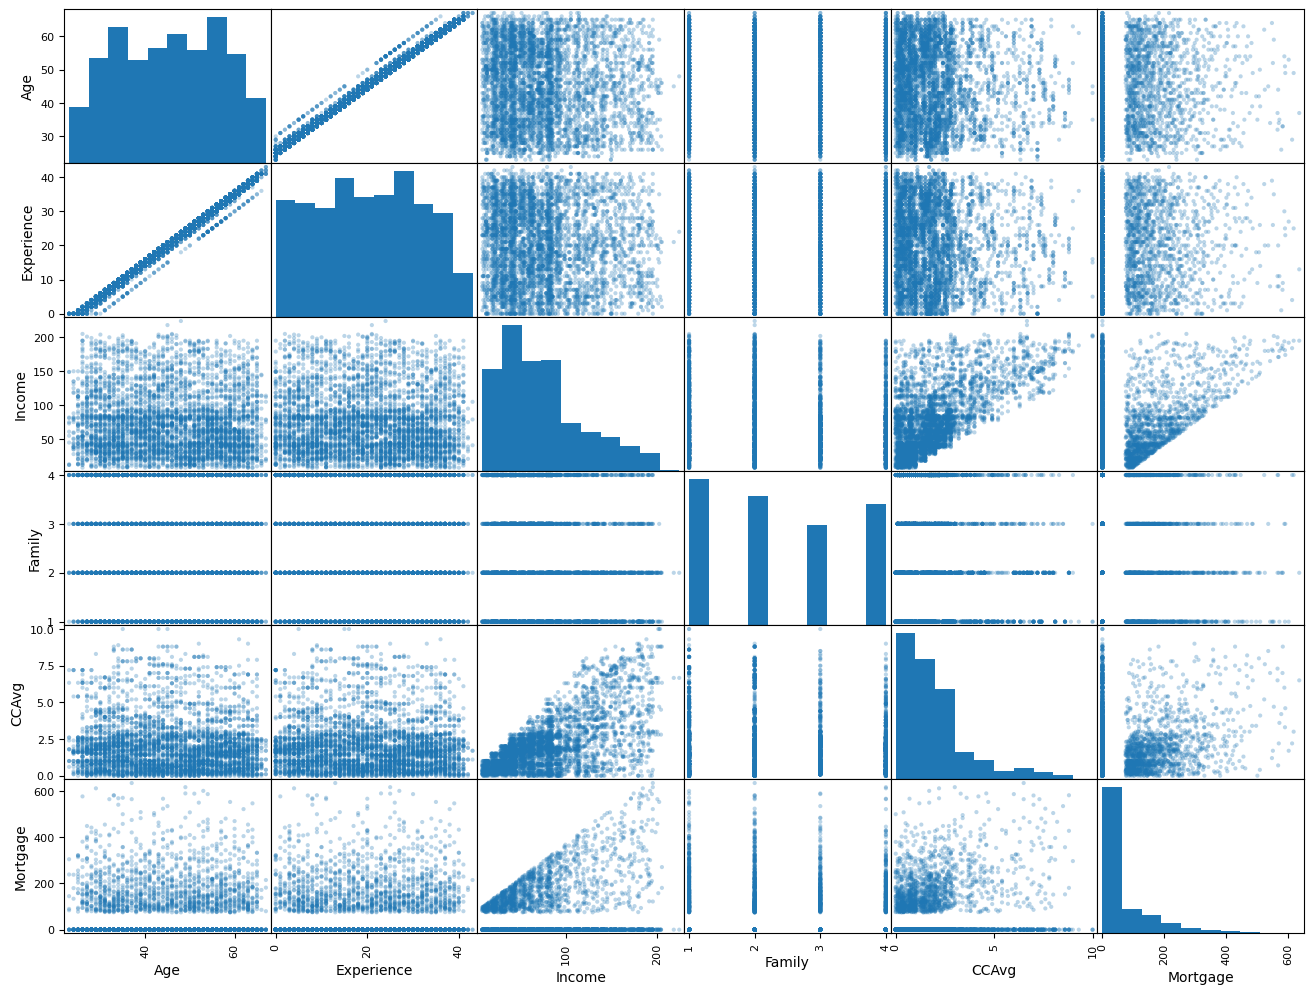

In [45]:
#Chart Correlation Matrix
from pandas.plotting import scatter_matrix
scatter_matrix(variaveis, figsize=(16,12), alpha=0.3)

In [14]:
# Matriz de Significância
from matrixSig import matrixSig
matriz_sig = matrixSig(matriz_corr, variaveis)
matriz_sig

,Age,Experience,Income,Family,CCAvg,Mortgage
Age,NA,0.0,0.00009,0.00103,0.00023,0.37539
Experience,0.0,NA,0.00095,0.00022,0.00041,0.44349
Income,0.00009,0.00095,NA,0.0,0.0,0.0
Family,0.00103,0.00022,0.0,NA,0.0,0.14833
CCAvg,0.00023,0.00041,0.0,0.0,NA,0.0
Mortgage,0.37539,0.44349,0.0,0.14833,0.0,NA


## Teste de Esfericidade Barlett

p-valor < 0,05 - matriz é estatisticamente diferente da matriz identidade.

In [15]:
#https://www.datacamp.com/tutorial/introduction-factor-analysis
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity



# Calcula p-valor para avaliar se rejeita H0
chi_square_value, p_value=calculate_bartlett_sphericity(variaveis)
print()

print(f'ChiSq: {chi_square_value:.4f}, p-value: {p_value:.4f}')


ChiSq: 25409.7764, p-value: 0.0000


# Aplicando Análise Fatorial

In [35]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(method= 'principal', n_factors=len(variaveis.columns), rotation=None)
fa.fit(variaveis)

FactorAnalyzer(method='principal', n_factors=6, rotation=None,
               rotation_kwargs={})

### Fatores

In [29]:
fatores_preditos = pd.DataFrame(fa.transform(variaveis))
fatores_preditos.columns = [f'Fator {1+i}' for i, v in enumerate(fatores_preditos.columns)]
fatores_preditos.head().round(3)

,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6
0,-1.497,-1.283,0.506,0.970,0.208,-1.070
1,0.133,-0.770,-0.002,0.477,0.615,0.535
2,-0.153,-0.935,-1.333,-0.905,1.065,-1.051
3,-0.995,0.307,-1.368,-0.229,-0.174,0.745
4,-0.732,-1.250,0.580,0.899,-0.087,1.371


### Eigenvalues

In [25]:
tabela_eigen = pd.DataFrame(fa.get_factor_variance())
tabela_eigen.columns = [f'Fator {1+i}' for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor', 'Variância', 'Variância Acumulada']
tabela_eigen.round(3)

,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6
Autovalor,2.028,1.737,0.976,0.909,0.344,0.006
Variância,0.338,0.289,0.163,0.151,0.057,0.001
Variância Acumulada,0.338,0.627,0.790,0.942,0.999,1.000


### Scores/ Weights

- Fator 1 possui maior peso nas variáveis Age, Experience, ou seja, aspectos pessoais.
- Fator 2 possui maior peso nas variáveis Income e CCAVG, ou seja, características financeiras.

In [30]:
tabela_scores = pd.DataFrame(fa.weights_)
tabela_scores.columns = [f'Fator {1+i}' for i, v in enumerate(tabela_scores.columns)]
tabela_scores.index = variaveis.columns
tabela_scores.round(3)

,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6
Age,0.473,0.156,0.045,0.050,0.007,9.329
Experience,0.472,0.160,0.042,0.047,-0.014,-9.328
Income,-0.149,0.482,0.017,0.187,-1.228,0.110
Family,-0.006,-0.198,0.743,0.655,-0.096,-0.043
CCAvg,-0.146,0.461,-0.032,0.367,1.162,-0.056
Mortgage,-0.056,0.205,0.684,-0.705,0.190,-0.002


### Cargas Fatoriais

In [31]:
tabela_cargas = pd.DataFrame(fa.loadings_)
tabela_cargas.columns = [f'Fator {1+i}' for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = variaveis.columns
tabela_cargas.round(3)

,Fator 1,Fator 2,Fator 3,Fator 4,Fator 5,Fator 6
Age,0.959,0.271,0.044,0.045,0.002,0.054
Experience,0.957,0.278,0.041,0.042,-0.005,-0.054
Income,-0.302,0.837,0.017,0.170,-0.423,0.001
Family,-0.012,-0.344,0.725,0.595,-0.033,-0.000
CCAvg,-0.296,0.800,-0.031,0.333,0.400,-0.000
Mortgage,-0.114,0.355,0.668,-0.641,0.065,-0.000


# Critério de Kaiser

In [32]:
#eigen values

ev, v = fa.get_eigenvalues()

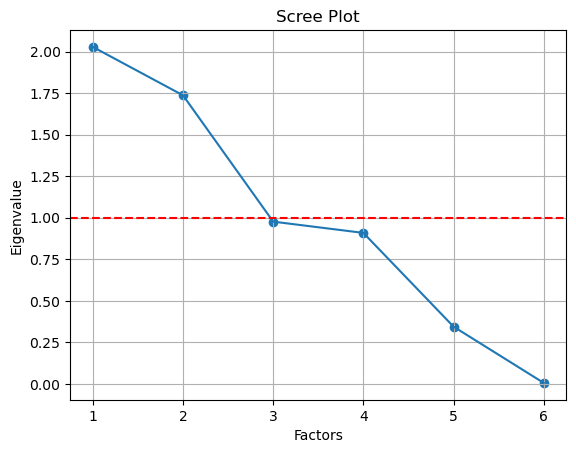

In [33]:
#https://www.kaggle.com/code/caesarlupum/factor-analysis-segmentation-analysis/notebook
plt.scatter(range(1,variaveis.shape[1]+1),ev)
plt.plot(range(1,variaveis.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid()
plt.show()

In [36]:
#Contando fatores que possuem eigenvalues > 1
k = len(list(filter(lambda x: x>1, ev )))

#Aplica Factor Analysis usando critério de Kaiser

fa2 = FactorAnalyzer(n_factors=k, method='principal', rotation=None)
fa2.fit(variaveis)

FactorAnalyzer(method='principal', n_factors=2, rotation=None,
               rotation_kwargs={})

### Fatores

In [37]:
fatores_preditos = pd.DataFrame(fa2.transform(variaveis))
fatores_preditos.columns = [f'Fator {1+i}' for i, v in enumerate(fatores_preditos.columns)]
fatores_preditos.head().round(3)

,Fator 1,Fator 2
0,-1.497,-1.283
1,0.133,-0.770
2,-0.153,-0.935
3,-0.995,0.307
4,-0.732,-1.250


### Comunalidades

Verificar se houve muita perda de variância utilizando apenas 2 fatores <br>

- Existem perdas relevantes em Family e Mortgage

In [40]:
comunalidade = pd.DataFrame(fa2.get_communalities())
comunalidade.columns = ['Comunalidade']
comunalidade.index = variaveis.columns
comunalidade.round(3)

,Comunalidade
Age,0.993
Experience,0.994
Income,0.792
Family,0.119
CCAvg,0.728
Mortgage,0.139


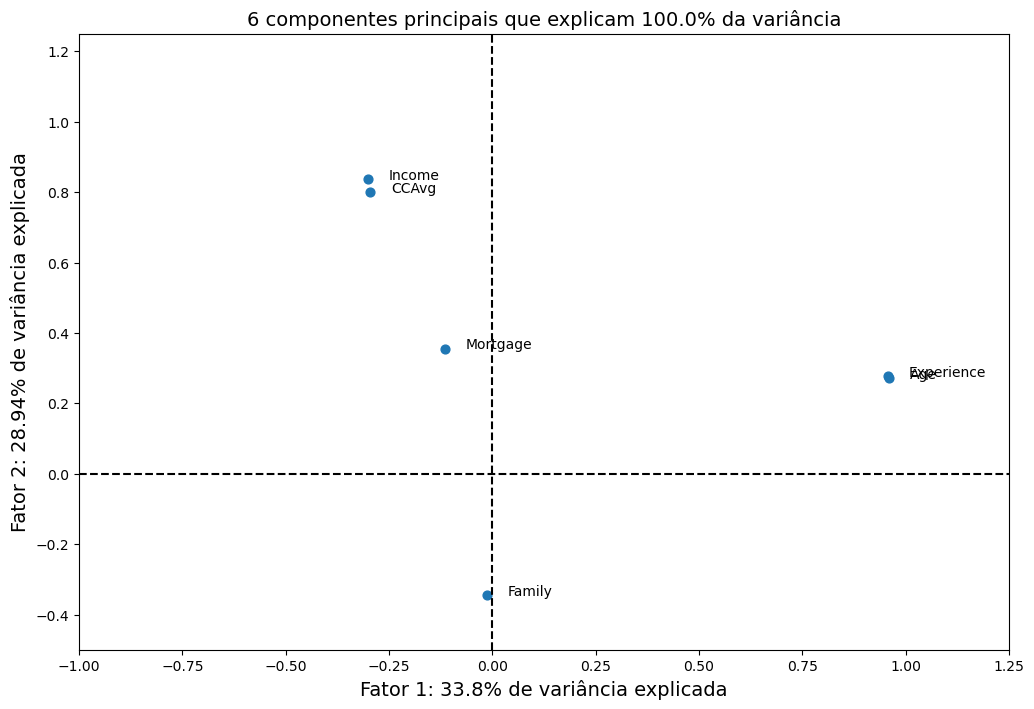

In [47]:
# Gráfico das cargas fatoriais e suas variâncias nos componentes principais
plt.figure(figsize=(12,8))

tabela_cargas_chart = tabela_cargas.reset_index()

plt.scatter(tabela_cargas_chart['Fator 1'], tabela_cargas_chart['Fator 2'], s=40)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.05, point['y'], point['val'])

label_point(x = tabela_cargas_chart['Fator 1'],
            y = tabela_cargas_chart['Fator 2'],
            val = tabela_cargas_chart['index'],
            ax = plt.gca()) 

plt.axhline(y=0, color='black', ls='--')
plt.axvline(x=0, color='black', ls='--')
plt.ylim([-0.5,1.25])
plt.xlim([-1.0,1.25])
plt.title(f"{len(tabela_cargas.columns)} componentes principais que explicam {round(tabela_eigen.T['Variância'].sum()*100,2)}% da variância", fontsize=14)
plt.xlabel(f"Fator 1: {round(tabela_eigen.T.iloc[0]['Variância']*100,2)}% de variância explicada", fontsize=14)
plt.ylabel(f"Fator 2: {round(tabela_eigen.T.iloc[1]['Variância']*100,2)}% de variância explicada", fontsize=14)
plt.show()

## Ranking

In [48]:
#Criação do ranking utilizando os dois fatores
emprestimo['Ranking'] = 0

for index, fator in enumerate(list(fatores_preditos.T.index)):
    variancia = tabela_eigen[fator][1]
    
    emprestimo['Ranking'] = emprestimo['Ranking'] + fatores_preditos[fator]*variancia 

emprestimo = emprestimo.sort_values(by=['Ranking'], ascending=False)

In [49]:
emprestimo.head()

,ID,Age,Experience,Income,Family,CCAvg,Mortgage,Ranking
2773,2774,63,37,185,2,7.9,358,1.261870
3943,3944,61,36,188,1,9.3,0,1.191435
1411,1412,65,39,184,1,5.4,176,1.191148
3608,3609,59,35,202,1,4.7,553,1.162164
301,302,65,39,150,2,6.9,196,1.153606
